# Modelo linear

In [1]:
from sklearn.datasets import load_diabetes

data = load_diabetes(as_frame=True, scaled=False)

In [2]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [3]:
data.frame

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,59.0,2.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,60.0,2.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0,178.0
438,47.0,2.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0,104.0
439,60.0,2.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0,132.0
440,36.0,1.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0,220.0


In [4]:
from sklearn.model_selection import train_test_split

train_dataset, test_dataset = train_test_split(data.frame, test_size=0.2, random_state=42)

In [5]:
X_train, y_train = train_dataset.drop(columns='target'), train_dataset['target']
X_test, y_test = test_dataset.drop(columns='target'), test_dataset['target']

In [6]:
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

root_mean_squared_error(y_test, y_pred)

53.85344583676595

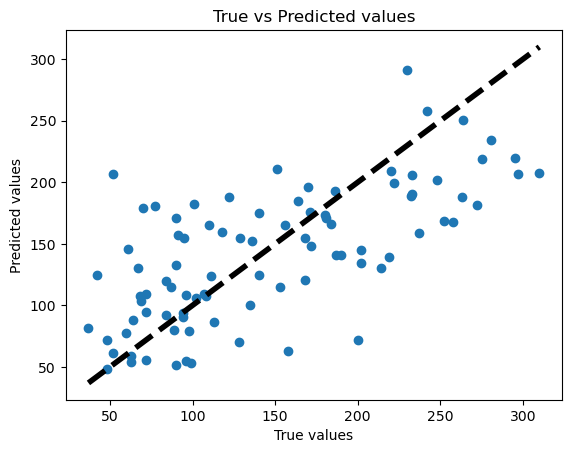

In [7]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('True vs Predicted values')
plt.show()

In [8]:
model.intercept_

np.float64(-341.3782363335048)

In [9]:
model.coef_

array([  0.13768782, -23.06446772,   5.84636265,   1.19709252,
        -1.28168474,   0.81115203,   0.60165319,  10.15953917,
        67.1089624 ,   0.20159907])

In [10]:
print(f'y_pred = {model.intercept_:.2f}', end='')
for i, coef in enumerate(model.coef_):
    print(f' + {coef:.2f} * X{i+1}', end='')
print()


y_pred = -341.38 + 0.14 * X1 + -23.06 * X2 + 5.85 * X3 + 1.20 * X4 + -1.28 * X5 + 0.81 * X6 + 0.60 * X7 + 10.16 * X8 + 67.11 * X9 + 0.20 * X10


In [11]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge

def create_simple_model():
    return LinearRegression()


def create_fancy_model():
    pipe = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('poly', PolynomialFeatures(degree=2, include_bias=False)),
        ('scaler', StandardScaler()),
        ('model', LinearRegression())
    ])
    return pipe


def create_super_fancy_model():
    pipe = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('poly', PolynomialFeatures(degree=2, include_bias=False)),
        ('scaler', StandardScaler()),
        ('model', Ridge(alpha=10)),
    ])
    return pipe

In [12]:
simple_model = create_simple_model()
fancy_model = create_fancy_model()
super_fancy_model = create_super_fancy_model()

In [13]:
simple_model

LinearRegression()

In [14]:
fancy_model

Pipeline(steps=[('imputer', SimpleImputer()),
                ('poly', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()), ('model', LinearRegression())])

In [15]:
super_fancy_model

Pipeline(steps=[('imputer', SimpleImputer()),
                ('poly', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()), ('model', Ridge(alpha=10))])

## Escolha de modelo

### Versão simples: train-test-val split

In [16]:
(
    X_train_val,
    X_test_val,
    y_train_val,
    y_test_val,
) = train_test_split(
    X_train,
    y_train,
    test_size=0.2,
    random_state=42,
)

In [17]:
simple_model.fit(X_train_val, y_train_val)
y_pred_simple = simple_model.predict(X_test_val)
simple_model_rmse_train = root_mean_squared_error(y_train_val, simple_model.predict(X_train_val))
simple_model_rmse_test = root_mean_squared_error(y_test_val, y_pred_simple)

In [18]:
simple_model.intercept_, simple_model.coef_

(np.float64(-356.27102468825933),
 array([ 2.55609573e-02, -2.35237947e+01,  5.89831451e+00,  1.11822066e+00,
        -1.26858688e+00,  7.39341319e-01,  6.35175946e-01,  1.08072391e+01,
         6.97017991e+01,  3.44766928e-01]))

In [19]:
fancy_model.fit(X_train_val, y_train_val)
y_pred_fancy = fancy_model.predict(X_test_val)
fancy_model_rmse_train = root_mean_squared_error(y_train_val, fancy_model.predict(X_train_val))
fancy_model_rmse_test = root_mean_squared_error(y_test_val, y_pred_fancy)

In [20]:
fancy_model.named_steps['model'].intercept_, fancy_model.named_steps['model'].coef_


(np.float64(149.78368794325692),
 array([ -142.07220968,    15.60492916,  -200.41146926,   211.96742475,
          878.86315684,  -776.75228802,  -134.3743944 ,   192.04817546,
         -170.12479933,  -195.98041221,    43.70060945,    23.38846109,
           -8.79940269,    15.48631561,   -83.73761665,   -56.72754163,
           82.68765363,    97.48847257,    67.797145  ,     6.95486823,
           15.60492916,    10.27097364,    34.55954522,   182.80509867,
          -66.78189598,   -74.75560185,  -118.63051332,   -76.85931295,
            8.6530185 ,    53.50276961,    88.09514288,  -315.37558572,
          281.71696916,    63.81002622,   -63.24714013,   207.10162765,
           10.31183656,    -4.41135861,   639.43939844,  -430.0566443 ,
         -204.93156395,   -28.61219229,  -359.80854461,   -87.41418628,
          909.65384017, -1607.01225943,   368.56597588,   636.25824392,
        -1940.7938706 ,  -392.33122403,   755.07168513,  -213.99540376,
         -634.36073344,  1549.6

In [21]:
super_fancy_model.fit(X_train_val, y_train_val)
y_pred_super_fancy = super_fancy_model.predict(X_test_val)
super_fancy_model_rmse_train = root_mean_squared_error(y_train_val, super_fancy_model.predict(X_train_val))
super_fancy_model_rmse_test = root_mean_squared_error(y_test_val, y_pred_super_fancy)

In [22]:
super_fancy_model.named_steps['model'].intercept_, super_fancy_model.named_steps['model'].coef_

(np.float64(149.78368794326235),
 array([-10.72679229,  -8.12477899,  -1.62871407,  -1.75029596,
         -6.22053501,   2.84119386,  -0.49069935,   1.21878738,
          7.45380343,  -6.49993372,  11.89007213,  14.08401811,
          0.36166473,   3.13797765,  -7.69739086, -10.0896425 ,
         -5.04233029,   3.10168031,   4.97127173,  -0.67535565,
         -8.12477899,  -0.22140033,   7.22887499,  -4.28770027,
         -4.56889451,   0.32249897,  -6.30486803,  -2.09983944,
          0.72437332,  12.23328156,  13.09520917,  -4.10418207,
          3.8393995 ,  -2.27218485,   3.75100904,   4.72504485,
          6.3989325 ,   0.60459006,  -1.46829094,   4.03340704,
         -4.30116564,   6.21888609,   6.81401456,  -0.35778721,
         -4.00280287,   0.2422812 ,   1.12090862,  -4.41436009,
         -1.36568626,  -1.36069124,   1.05466203,   0.49974732,
          1.36891399,   7.92513457,   3.50723783,   2.38857958,
         -6.83040698,  11.33985114,  -3.26284698,   4.21775867,
       

In [23]:
simple_model_rmse_train, simple_model_rmse_test

(53.84039638085457, 53.37368921191778)

In [24]:
fancy_model_rmse_train, fancy_model_rmse_test

(48.278119552202924, 59.41346770357823)

In [25]:
super_fancy_model_rmse_train, super_fancy_model_rmse_test

(52.28519670259243, 53.797911695384414)

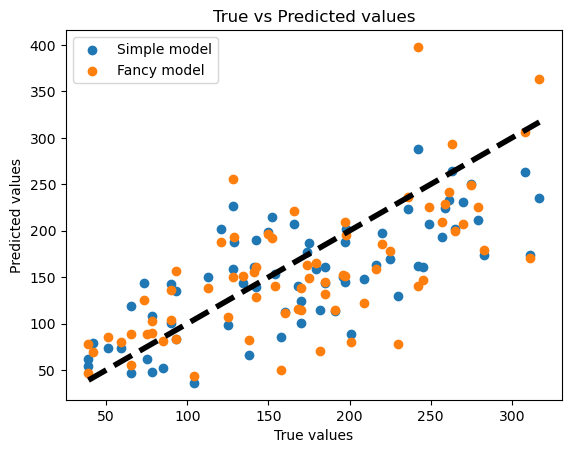

In [26]:
plt.scatter(y_test_val, y_pred_simple, label='Simple model')
plt.scatter(y_test_val, y_pred_fancy, label='Fancy model')
plt.plot([y_test_val.min(), y_test_val.max()], [y_test_val.min(), y_test_val.max()], 'k--', lw=4)
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('True vs Predicted values')
plt.legend()
plt.show()


## Versão mais "sofisticada": validação cruzada 

In [27]:
from sklearn.model_selection import cross_val_score

cv = 3

simple_model_cv = cross_val_score(
    simple_model,
    X_train,
    y_train,
    cv=cv,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
)

fancy_model_cv = cross_val_score(
    fancy_model,
    X_train,
    y_train,
    cv=cv,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
)

super_fancy_model_cv = cross_val_score(
    super_fancy_model,
    X_train,
    y_train,
    cv=cv,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
)

In [28]:
simple_model_cv = -simple_model_cv
simple_model_cv, simple_model_cv.mean()

(array([53.31283683, 53.16309571, 59.79731897]), np.float64(55.42441716921894))

In [29]:
fancy_model_cv = -fancy_model_cv
fancy_model_cv, fancy_model_cv.mean()

(array([58.40484267, 67.97745   , 75.23943858]), np.float64(67.207243748371))

In [30]:
super_fancy_model_cv = -super_fancy_model_cv
super_fancy_model_cv, super_fancy_model_cv.mean()

(array([53.74601246, 54.03124136, 59.10109414]),
 np.float64(55.626115986295105))